In [1]:
import sys
sys.path.insert(0, '../Results')
sys.path.insert(0, '../../../src')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
import os
from visualization import perc, SetPlotRC, ApplyFont


In [2]:
if not os.path.exists("Figures"):
    os.mkdir("Figures")

In [3]:
# global_color_vector = ["b", "g", "r", "c", "m", "y"]
global_color_vector = ["blue", "red", "green", "orange", "m", "y"]

# MNIST $\mu_{ff}$ Results

In [4]:
df_results_corinfo_mnist = pd.read_pickle(r"../Results/simulation_results_CorInfoMax_MNIST_muForward_Ablation_V2.pkl")
df_results_corinfo_mnist['Trn_ACC'] = df_results_corinfo_mnist.apply(lambda row: row['Trn_ACC_list'][-1], axis = 1)
df_results_corinfo_mnist['Tst_ACC'] = df_results_corinfo_mnist.apply(lambda row: row['Tst_ACC_list'][-1], axis = 1)
df_results_corinfo_mnist["muForward_multiplier"] = df_results_corinfo_mnist.apply(lambda row: row["Hyperparams"]["muForward_multiplier"], axis = 1)
df_setting_corinfo_mnist = df_results_corinfo_mnist[['setting_number', 'Trn_ACC', 'Tst_ACC']].groupby('setting_number').mean().reset_index()
best_setting_corinfo_mnist = df_setting_corinfo_mnist.iloc[df_setting_corinfo_mnist['Trn_ACC'].argmax()]['setting_number']
print(best_setting_corinfo_mnist) #= 1

print(df_results_corinfo_mnist.shape)

5.0
(25, 10)


In [5]:
df_setting = df_results_corinfo_mnist[['muForward_multiplier', 'Trn_ACC', 'Tst_ACC']].groupby('muForward_multiplier').mean().reset_index()
df_setting[['Trn_ACC_std', 'Tst_ACC_std']] = df_results_corinfo_mnist[['muForward_multiplier', 'Trn_ACC', 'Tst_ACC']].groupby('muForward_multiplier').std().reset_index()[['Trn_ACC', 'Tst_ACC']]
df_setting

,muForward_multiplier,Trn_ACC,Tst_ACC,Trn_ACC_std,Tst_ACC_std
0,0.10,0.936590,0.93412,0.016489,0.014707
1,0.25,0.966827,0.96198,0.000582,0.002398
2,0.50,0.979530,0.97048,0.001021,0.001119
3,0.75,0.985617,0.97496,0.000721,0.001043
4,1.00,0.989303,0.97626,0.000333,0.000627


In [6]:
trn_acc_list = []
tst_acc_list = []
trn_std_list = []
tst_std_list = []

for mu_forward_value in df_results_corinfo_mnist["muForward_multiplier"].unique():
    trn_acc_list.append(np.stack(df_results_corinfo_mnist.loc[df_results_corinfo_mnist["muForward_multiplier"] == mu_forward_value]['Trn_ACC_list'].values, 1).mean(1))
    tst_acc_list.append(np.stack(df_results_corinfo_mnist.loc[df_results_corinfo_mnist["muForward_multiplier"] == mu_forward_value]['Tst_ACC_list'].values, 1).mean(1))
    trn_std_list.append(np.stack(df_results_corinfo_mnist.loc[df_results_corinfo_mnist["muForward_multiplier"] == mu_forward_value]['Trn_ACC_list'].values, 1).std(1))
    tst_std_list.append(np.stack(df_results_corinfo_mnist.loc[df_results_corinfo_mnist["muForward_multiplier"] == mu_forward_value]['Tst_ACC_list'].values, 1).std(1))

df_setting['Trn_ACC_list'] = trn_acc_list
df_setting['Tst_ACC_list'] = tst_acc_list
df_setting['Trn_STD_list'] = trn_std_list
df_setting['Tst_STD_list'] = tst_std_list

In [7]:
df_setting

,muForward_multiplier,Trn_ACC,Tst_ACC,Trn_ACC_std,Tst_ACC_std,Trn_ACC_list,Tst_ACC_list,Trn_STD_list,Tst_STD_list
0,0.10,0.936590,0.93412,0.016489,0.014707,"[0.88393, 0.9056599999999999, 0.91729666666666...","[0.8908400000000001, 0.91114, 0.92096, 0.92744...","[0.002205583822936665, 0.0006539283005209579, ...","[0.00261120661763866, 0.0017973313550928762, 0..."
1,0.25,0.966827,0.96198,0.000582,0.002398,"[0.9095600000000001, 0.9289499999999998, 0.940...","[0.91364, 0.9305, 0.9392799999999999, 0.94608,...","[0.0014568077734858817, 0.0012539271642855766,...","[0.002122828302053633, 0.0017652195330893187, ..."
2,0.50,0.979530,0.97048,0.001021,0.001119,"[0.9256233333333335, 0.9462533333333333, 0.956...","[0.92756, 0.94512, 0.9526999999999999, 0.95841...","[0.0015068215259648721, 0.0008269354401778885,...","[0.0017794381135627984, 0.0014019985734657445,..."
3,0.75,0.985617,0.97496,0.000721,0.001043,"[0.9337033333333332, 0.9556633333333332, 0.963...","[0.9334, 0.9531000000000001, 0.959260000000000...","[0.0014555029676674922, 0.0010980487744682048,...","[0.0018729655629508896, 0.002008979840615657, ..."
4,1.00,0.989303,0.97626,0.000333,0.000627,"[0.9395499999999999, 0.9605033333333335, 0.968...","[0.9382400000000001, 0.9570399999999999, 0.962...","[0.0012182409905725402, 0.0015384479913933468,...","[0.0013455110553243109, 0.001953048898517368, ..."


findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times Ne

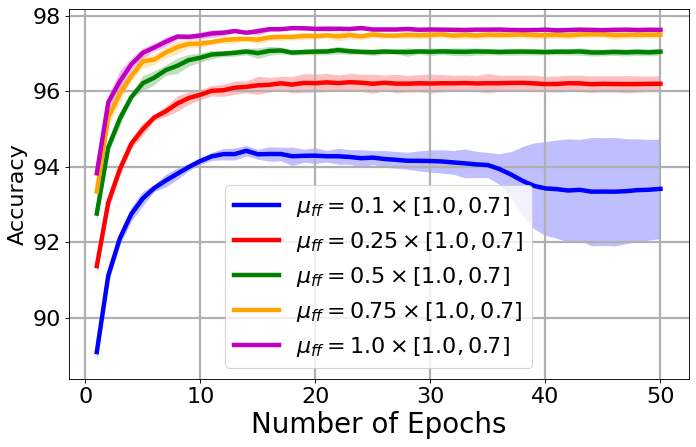

In [8]:
fh2=plt.figure(figsize=(10, 6), dpi=80)
for ii in range(df_setting.shape[0]):
    data = df_setting.iloc[ii]['Tst_ACC_list']*100
    std_data = df_setting.iloc[ii]['Tst_STD_list']*100
    x = np.arange(1, data.shape[0]+1)
    plt.plot(x, data, linewidth=4, color = global_color_vector[ii], label = r"$\mu_{ff} = " + str(df_setting.iloc[ii]["muForward_multiplier"]) + r" \times" + " [{}, {}]$".format(1.0, 0.7))
    plt.fill_between(x, data + std_data, data - std_data, alpha=0.25, linewidth=0, color = global_color_vector[ii])
    SetPlotRC()
    gh=plt.grid(linewidth=2)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.ylabel('Accuracy',fontsize=25)
    plt.xlabel(r"Number of Epochs",fontsize=25)
    plt.legend(fontsize = 20, loc = "best")
ApplyFont(plt.gca())
plt.savefig('Figures/CorInfoMaxMNIST_muForwardAblation.pdf', format='pdf', bbox_inches = 'tight')

In [9]:
df_results_corinfo_mnist = pd.read_pickle(r"../Results/simulation_results_CorInfoMax_MNIST_neural_lr_start_Ablation_V2.pkl")
df_results_corinfo_mnist['Trn_ACC'] = df_results_corinfo_mnist.apply(lambda row: row['Trn_ACC_list'][-1], axis = 1)
df_results_corinfo_mnist['Tst_ACC'] = df_results_corinfo_mnist.apply(lambda row: row['Tst_ACC_list'][-1], axis = 1)
df_results_corinfo_mnist["neural_lr_start"] = df_results_corinfo_mnist.apply(lambda row: row["Hyperparams"]["neural_lr"], axis = 1)
df_setting_corinfo_mnist = df_results_corinfo_mnist[['setting_number', 'Trn_ACC', 'Tst_ACC']].groupby('setting_number').mean().reset_index()
best_setting_corinfo_mnist = df_setting_corinfo_mnist.iloc[df_setting_corinfo_mnist['Trn_ACC'].argmax()]['setting_number']
print(best_setting_corinfo_mnist) #= 1

print(df_results_corinfo_mnist.shape)

2.0
(30, 10)


In [10]:
df_setting = df_results_corinfo_mnist[['neural_lr_start', 'Trn_ACC', 'Tst_ACC']].groupby('neural_lr_start').mean().reset_index()
df_setting[['Trn_ACC_std', 'Tst_ACC_std']] = df_results_corinfo_mnist[['neural_lr_start', 'Trn_ACC', 'Tst_ACC']].groupby('neural_lr_start').std().reset_index()[['Trn_ACC', 'Tst_ACC']]
df_setting

,neural_lr_start,Trn_ACC,Tst_ACC,Trn_ACC_std,Tst_ACC_std
0,0.015,0.102790,0.10368,0.005839,0.005861
1,0.050,0.988437,0.97434,0.001048,0.001176
2,0.075,0.987477,0.97366,0.000956,0.000953
3,0.100,0.844643,0.83416,0.317491,0.311017
4,0.150,0.098950,0.10008,0.000320,0.002848
5,0.300,0.099410,0.09860,0.001550,0.001342


In [11]:
trn_acc_list = []
tst_acc_list = []
trn_std_list = []
tst_std_list = []

for neural_lr_start in np.sort(df_results_corinfo_mnist["neural_lr_start"].unique()):
    trn_acc_list.append(np.stack(df_results_corinfo_mnist.loc[df_results_corinfo_mnist["neural_lr_start"] == neural_lr_start]['Trn_ACC_list'].values, 1).mean(1))
    tst_acc_list.append(np.stack(df_results_corinfo_mnist.loc[df_results_corinfo_mnist["neural_lr_start"] == neural_lr_start]['Tst_ACC_list'].values, 1).mean(1))
    trn_std_list.append(np.stack(df_results_corinfo_mnist.loc[df_results_corinfo_mnist["neural_lr_start"] == neural_lr_start]['Trn_ACC_list'].values, 1).std(1))
    tst_std_list.append(np.stack(df_results_corinfo_mnist.loc[df_results_corinfo_mnist["neural_lr_start"] == neural_lr_start]['Tst_ACC_list'].values, 1).std(1))

df_setting['Trn_ACC_list'] = trn_acc_list
df_setting['Tst_ACC_list'] = tst_acc_list
df_setting['Trn_STD_list'] = trn_std_list
df_setting['Tst_STD_list'] = tst_std_list
df_setting

,neural_lr_start,Trn_ACC,Tst_ACC,Trn_ACC_std,Tst_ACC_std,Trn_ACC_list,Tst_ACC_list,Trn_STD_list,Tst_STD_list
0,0.015,0.102790,0.10368,0.005839,0.005861,"[0.4782733333333333, 0.42306333333333335, 0.26...","[0.48077999999999993, 0.4225999999999999, 0.26...","[0.3243741164149816, 0.34203097900628826, 0.29...","[0.32714370787163244, 0.3433281753657861, 0.30..."
1,0.050,0.988437,0.97434,0.001048,0.001176,"[0.9395499999999999, 0.9606533333333334, 0.968...","[0.9382400000000001, 0.9572200000000001, 0.963...","[0.0012182409905725402, 0.0016329727493133385,...","[0.0013455110553243109, 0.002157220433799003, ..."
2,0.075,0.987477,0.97366,0.000956,0.000953,"[0.9408899999999999, 0.9617699999999999, 0.969...","[0.94018, 0.9579599999999999, 0.96402, 0.96732...","[0.0009334880824092041, 0.001822860999150004, ...","[0.0013151425778218909, 0.0022267465055546875,..."
3,0.100,0.844643,0.83416,0.317491,0.311017,"[0.9408066666666667, 0.96197, 0.96969666666666...","[0.9399599999999999, 0.95854, 0.9638, 0.967259...","[0.0009194563611178135, 0.00181485842729153, 0...","[0.0012322337440599422, 0.002021484602958927, ..."
4,0.150,0.098950,0.10008,0.000320,0.002848,"[0.21062333333333333, 0.12091666666666667, 0.1...","[0.2118, 0.12145999999999998, 0.12149999999999...","[0.10032161426576473, 0.04410891192390843, 0.0...","[0.10031719693053628, 0.0443657345256449, 0.04..."
5,0.300,0.099410,0.09860,0.001550,0.001342,"[0.09941, 0.09941, 0.09941, 0.09941, 0.09941, ...","[0.0986, 0.0986, 0.0986, 0.0986, 0.0986, 0.098...","[0.0013866666666666693, 0.0013866666666666693,...","[0.001200000000000001, 0.001200000000000001, 0..."


findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times Ne

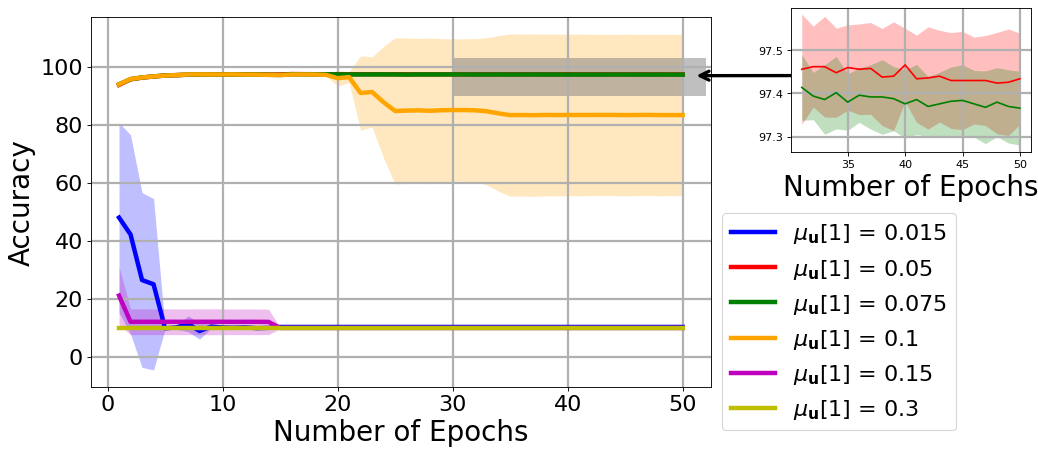

In [12]:
from matplotlib.patches import Rectangle
fh2=plt.subplots(figsize=(10, 6), dpi=80)
for ii in range( df_setting.shape[0]):
    data = df_setting.iloc[ii]['Tst_ACC_list']*100
    std_data = df_setting.iloc[ii]['Tst_STD_list']*100
    x = np.arange(1, data.shape[0]+1)
    plt.plot(x, data, linewidth=4, color = global_color_vector[ii], label = r"$\mu_{\mathbf{u}}[1]$ = " + str(df_setting.iloc[ii]["neural_lr_start"]))
    plt.fill_between(x, data + std_data, data - std_data, alpha=0.25, linewidth=0, color = global_color_vector[ii])
SetPlotRC()
ApplyFont(plt.gca())
gh=plt.grid(linewidth=2)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('Accuracy',fontsize=25)
plt.xlabel(r"Number of Epochs",fontsize=25)
plt.legend(fontsize = 20, loc = "best", bbox_to_anchor=(1, 0.5))
  
someX, someY = 30, 90
currentAxis = plt.gca()
currentAxis.add_patch(Rectangle((someX, someY), 22, 13, facecolor="grey", alpha = .5))

# Add an arrow pointing to the zoomed-in region
plt.annotate('Zoomed In', xy=(51, 97), xytext=(65, 95), arrowprops=dict(facecolor='black', lw=3, arrowstyle='->'), fontsize=20)
sub_axes = plt.axes([1.0, 0.6, .3, .3])
for ii in range(1, df_setting.shape[0]-3):
    data = df_setting.iloc[ii]['Tst_ACC_list'][30:]*100
    std_data = df_setting.iloc[ii]['Tst_STD_list'][30:]*100
    x = np.arange(31, data.shape[0]+31)
    # location for the zoomed portion  

    # plot the zoomed portion
    sub_axes.plot(x, data, color = global_color_vector[ii], label = r"$\mu_{\mathbf{u}}[1]$ = " + str(df_setting.iloc[ii]["neural_lr_start"])) 
    sub_axes.fill_between(x, data + std_data, data - std_data, alpha=0.25, linewidth=0, color = global_color_vector[ii])


# plt.ylabel('Accuracy',fontsize=15)
plt.xlabel(r"Number of Epochs",fontsize=15)
SetPlotRC()
ApplyFont(plt.gca())
gh=plt.grid(linewidth=2)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.savefig('Figures/CorInfoMaxMNIST_neuralLRAblation.pdf', format='pdf', bbox_inches = 'tight')

# CIFAR10 Results

In [13]:
df_results_corinfo_cifar = pd.read_pickle(r"../Results/simulation_results_CorInfoMax_CIFAR10_muForward_Ablation_V2.pkl")
df_results_corinfo_cifar['Trn_ACC'] = df_results_corinfo_cifar.apply(lambda row: row['Trn_ACC_list'][-1], axis = 1)
df_results_corinfo_cifar['Tst_ACC'] = df_results_corinfo_cifar.apply(lambda row: row['Tst_ACC_list'][-1], axis = 1)
df_results_corinfo_cifar["muForward_multiplier"] = df_results_corinfo_cifar.apply(lambda row: row["Hyperparams"]["muForward_multiplier"], axis = 1)
df_setting_corinfo_cifar = df_results_corinfo_cifar[['setting_number', 'Trn_ACC', 'Tst_ACC']].groupby('setting_number').mean().reset_index()
best_setting_corinfo_cifar = df_setting_corinfo_cifar.iloc[df_setting_corinfo_cifar['Trn_ACC'].argmax()]['setting_number']
print(best_setting_corinfo_cifar) #= 1

print(df_results_corinfo_cifar.shape)

5.0
(25, 10)


In [14]:
df_setting = df_results_corinfo_cifar[['muForward_multiplier', 'Trn_ACC', 'Tst_ACC']].groupby('muForward_multiplier').mean().reset_index()
df_setting[['Trn_ACC_std', 'Tst_ACC_std']] = df_results_corinfo_cifar[['muForward_multiplier', 'Trn_ACC', 'Tst_ACC']].groupby('muForward_multiplier').std().reset_index()[['Trn_ACC', 'Tst_ACC']]
df_setting

,muForward_multiplier,Trn_ACC,Tst_ACC,Trn_ACC_std,Tst_ACC_std
0,0.10,0.396640,0.39088,0.003941,0.005459
1,0.25,0.479404,0.45234,0.004555,0.002123
2,0.50,0.555296,0.49316,0.002640,0.001856
3,0.75,0.607552,0.50868,0.001810,0.003321
4,1.00,0.649076,0.51772,0.000996,0.004120


In [15]:
trn_acc_list = []
tst_acc_list = []
trn_std_list = []
tst_std_list = []

for mu_forward_value in df_results_corinfo_cifar["muForward_multiplier"].unique():
    trn_acc_list.append(np.stack(df_results_corinfo_cifar.loc[df_results_corinfo_cifar["muForward_multiplier"] == mu_forward_value]['Trn_ACC_list'].values, 1).mean(1))
    tst_acc_list.append(np.stack(df_results_corinfo_cifar.loc[df_results_corinfo_cifar["muForward_multiplier"] == mu_forward_value]['Tst_ACC_list'].values, 1).mean(1))
    trn_std_list.append(np.stack(df_results_corinfo_cifar.loc[df_results_corinfo_cifar["muForward_multiplier"] == mu_forward_value]['Trn_ACC_list'].values, 1).std(1))
    tst_std_list.append(np.stack(df_results_corinfo_cifar.loc[df_results_corinfo_cifar["muForward_multiplier"] == mu_forward_value]['Tst_ACC_list'].values, 1).std(1))

df_setting['Trn_ACC_list'] = trn_acc_list
df_setting['Tst_ACC_list'] = tst_acc_list
df_setting['Trn_STD_list'] = trn_std_list
df_setting['Tst_STD_list'] = tst_std_list

findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times Ne

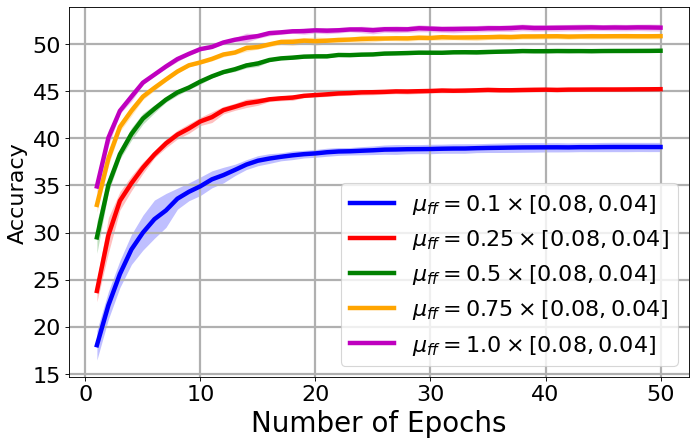

In [16]:
fh2=plt.figure(figsize=(10, 6), dpi=80)
for ii in range(df_setting.shape[0]):
    data = df_setting.iloc[ii]['Tst_ACC_list']*100
    std_data = df_setting.iloc[ii]['Tst_STD_list']*100
    x = np.arange(1, data.shape[0]+1)
    plt.plot(x, data, color = global_color_vector[ii], linewidth=4, label = r"$\mu_{ff} = " + str(df_setting.iloc[ii]["muForward_multiplier"]) + r" \times" + " [{}, {}]$".format(0.08, 0.04))
    plt.fill_between(x, data + std_data, data - std_data, alpha=0.25, linewidth=0, color = global_color_vector[ii])
    SetPlotRC()
    gh=plt.grid(linewidth=2)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.ylabel('Accuracy',fontsize=25)
    plt.xlabel(r"Number of Epochs",fontsize=25)
    plt.legend(fontsize = 20, loc = "best")
ApplyFont(plt.gca())
plt.savefig('Figures/CorInfoMaxCIFAR_muForwardAblation.pdf', format='pdf', bbox_inches = 'tight')

In [17]:
df_results_corinfo_cifar = pd.read_pickle(r"../Results/simulation_results_CorInfoMax_CIFAR10_neural_lr_start_Ablation_V2.pkl")
df_results_corinfo_cifar['Trn_ACC'] = df_results_corinfo_cifar.apply(lambda row: row['Trn_ACC_list'][-1], axis = 1)
df_results_corinfo_cifar['Tst_ACC'] = df_results_corinfo_cifar.apply(lambda row: row['Tst_ACC_list'][-1], axis = 1)
df_results_corinfo_cifar["neural_lr_start"] = df_results_corinfo_cifar.apply(lambda row: row["Hyperparams"]["neural_lr"], axis = 1)
df_setting_corinfo_cifar = df_results_corinfo_cifar[['setting_number', 'Trn_ACC', 'Tst_ACC']].groupby('setting_number').mean().reset_index()
best_setting_corinfo_mnist = df_setting_corinfo_cifar.iloc[df_setting_corinfo_cifar['Trn_ACC'].argmax()]['setting_number']
print(best_setting_corinfo_mnist) #= 1

print(df_results_corinfo_cifar.shape)

4.0
(30, 10)


In [18]:
df_setting = df_results_corinfo_cifar[['neural_lr_start', 'Trn_ACC', 'Tst_ACC']].groupby('neural_lr_start').mean().reset_index()
df_setting[['Trn_ACC_std', 'Tst_ACC_std']] = df_results_corinfo_cifar[['neural_lr_start', 'Trn_ACC', 'Tst_ACC']].groupby('neural_lr_start').std().reset_index()[['Trn_ACC', 'Tst_ACC']]
df_setting

,neural_lr_start,Trn_ACC,Tst_ACC,Trn_ACC_std,Tst_ACC_std
0,0.015,0.548384,0.49312,0.003274,0.002047
1,0.050,0.649076,0.51772,0.000996,0.004120
2,0.075,0.655708,0.51974,0.001805,0.001664
3,0.100,0.656964,0.51958,0.001187,0.003210
4,0.150,0.097736,0.09822,0.017853,0.018310
5,0.300,0.111228,0.11018,0.025773,0.027168


In [19]:
trn_acc_list = []
tst_acc_list = []
trn_std_list = []
tst_std_list = []

for neural_lr_start in np.sort(df_results_corinfo_cifar["neural_lr_start"].unique()):
    trn_acc_list.append(np.stack(df_results_corinfo_cifar.loc[df_results_corinfo_cifar["neural_lr_start"] == neural_lr_start]['Trn_ACC_list'].values, 1).mean(1))
    tst_acc_list.append(np.stack(df_results_corinfo_cifar.loc[df_results_corinfo_cifar["neural_lr_start"] == neural_lr_start]['Tst_ACC_list'].values, 1).mean(1))
    trn_std_list.append(np.stack(df_results_corinfo_cifar.loc[df_results_corinfo_cifar["neural_lr_start"] == neural_lr_start]['Trn_ACC_list'].values, 1).std(1))
    tst_std_list.append(np.stack(df_results_corinfo_cifar.loc[df_results_corinfo_cifar["neural_lr_start"] == neural_lr_start]['Tst_ACC_list'].values, 1).std(1))

df_setting['Trn_ACC_list'] = trn_acc_list
df_setting['Tst_ACC_list'] = tst_acc_list
df_setting['Trn_STD_list'] = trn_std_list
df_setting['Tst_STD_list'] = tst_std_list
df_setting

,neural_lr_start,Trn_ACC,Tst_ACC,Trn_ACC_std,Tst_ACC_std,Trn_ACC_list,Tst_ACC_list,Trn_STD_list,Tst_STD_list
0,0.015,0.548384,0.49312,0.003274,0.002047,"[0.317652, 0.371288, 0.400472, 0.423256, 0.439...","[0.31798000000000004, 0.36892, 0.39558, 0.4142...","[0.008684962636649621, 0.002213363052009308, 0...","[0.008304793796356421, 0.004813896550612612, 0..."
1,0.050,0.649076,0.51772,0.000996,0.004120,"[0.350976, 0.406524, 0.440156, 0.4667239999999...","[0.34898, 0.40070000000000006, 0.4293, 0.44437...","[0.007669601293418048, 0.00625176327126996, 0....","[0.007349122396585872, 0.00824936361181878, 0...."
2,0.075,0.655708,0.51974,0.001805,0.001664,"[0.351732, 0.40758799999999995, 0.441232, 0.46...","[0.34984, 0.4013, 0.42940000000000006, 0.44592...","[0.007667485637417268, 0.006092849579630215, 0...","[0.006760059171338672, 0.007745708489221626, 0..."
3,0.100,0.656964,0.51958,0.001187,0.003210,"[0.35186399999999995, 0.4077719999999999, 0.44...","[0.35002, 0.40099999999999997, 0.42938, 0.4456...","[0.007808461051961525, 0.006139779800611738, 0...","[0.007553912893328862, 0.007612358373066792, 0..."
4,0.150,0.097736,0.09822,0.017853,0.018310,"[0.10363599999999999, 0.10902, 0.097852, 0.090...","[0.10413999999999998, 0.11062000000000001, 0.0...","[0.014401957644709274, 0.027601113021035944, 0...","[0.016334454383296677, 0.028759860917605285, 0..."
5,0.300,0.111228,0.11018,0.025773,0.027168,"[0.10237199999999999, 0.110752, 0.113288000000...","[0.10207999999999999, 0.1116, 0.1149, 0.10726,...","[0.023136376898728113, 0.02073500074752832, 0....","[0.02485360336047874, 0.02181788257370545, 0.0..."


findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times Ne

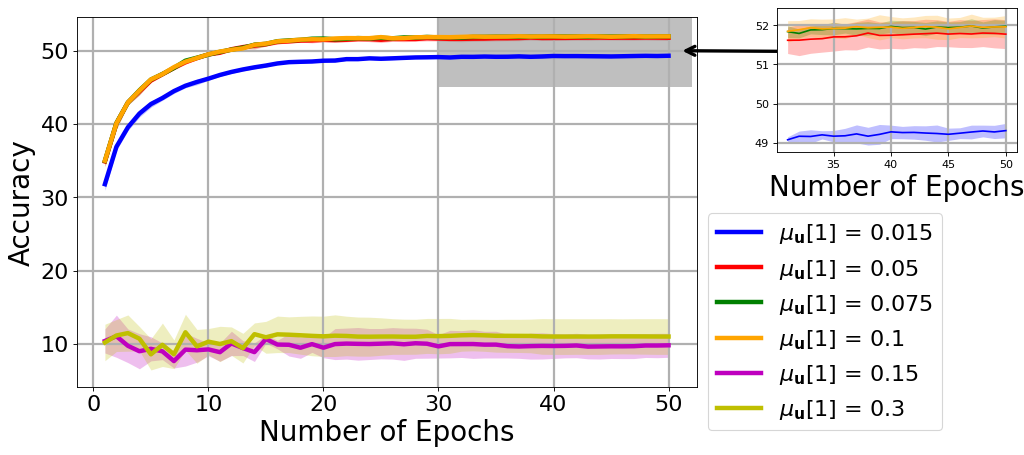

In [20]:
fh2=plt.subplots(figsize=(10, 6), dpi=80)
for ii in range( df_setting.shape[0]):
    data = df_setting.iloc[ii]['Tst_ACC_list']*100
    std_data = df_setting.iloc[ii]['Tst_STD_list']*100
    x = np.arange(1, data.shape[0]+1)
    plt.plot(x, data, color = global_color_vector[ii], linewidth=4, label = r"$\mu_{\mathbf{u}}[1]$ = " + str(df_setting.iloc[ii]["neural_lr_start"]))
    plt.fill_between(x, data + std_data, data - std_data, alpha=0.25, linewidth=0, color = global_color_vector[ii])
SetPlotRC()
ApplyFont(plt.gca())
gh=plt.grid(linewidth=2)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('Accuracy',fontsize=25)
plt.xlabel(r"Number of Epochs",fontsize=25)
plt.legend(fontsize = 20, loc = "best", bbox_to_anchor=(1, 0.5))
someX, someY = 30, 45
currentAxis = plt.gca()
currentAxis.add_patch(Rectangle((someX, someY), 22, 10, facecolor="grey", alpha = .5))
# Add an arrow pointing to the zoomed-in region
plt.annotate('Zoomed In', xy=(51, 50), xytext=(65, 49), arrowprops=dict(facecolor='black', lw=3, arrowstyle='->'), fontsize=20)

sub_axes = plt.axes([1.0, 0.6, .3, .3])
for ii in range(df_setting.shape[0]-2):
    data = df_setting.iloc[ii]['Tst_ACC_list'][30:]*100
    std_data = df_setting.iloc[ii]['Tst_STD_list'][30:]*100
    x = np.arange(31, data.shape[0]+31)
    # location for the zoomed portion  

    # plot the zoomed portion
    sub_axes.plot(x, data, color = global_color_vector[ii], label = r"$\mu_{\mathbf{u}}[1]$ = " + str(df_setting.iloc[ii]["neural_lr_start"])) 
    sub_axes.fill_between(x, data + std_data, data - std_data, alpha=0.25, linewidth=0, color = global_color_vector[ii])
# plt.ylabel('Accuracy',fontsize=15)
plt.xlabel(r"Number of Epochs",fontsize=15)
SetPlotRC()
ApplyFont(plt.gca())
gh=plt.grid(linewidth=2)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.savefig('Figures/CorInfoMaxCIFAR_neuralLRAblation.pdf', format='pdf', bbox_inches = 'tight')
